# Deep Leaning

- Deep learning is a subfield of machine learning that uses multi-layered artificial neural networks to extract progressively higher-level features from the raw input.
- inspired by the structure and function of the brain, namely the interconnecting of many neurons.
- teaches computers to do what comes naturally to humans: learn by example
    - AI - science of making things smart
    - ML - approach to achieve AI, where machines learn from experience
    - DL - subset of ML, where we use neural networks to implement ML

<img alt="picture 5" src="https://cdn.jsdelivr.net/gh/sharatsachin/images-cdn@master/images/b9bae26b218ef0aa016e0f79b6dd9abd5b937a4b9686036f202d1fee3b9ab394.png" style="display: block; margin-left: auto; margin-right: auto;">


## Fundamentals of Neural Network

### Why Deep Learning?

Limitations of linear models:
- Linearity implies the weaker assumption of monotonicity (increse or decrease in feature must always cause an increase or decrease in model's output)
- Linearity is not always plausible
    - predicting health as a function of body temperature (temp above and below 37 deg C indicates greater risk)
    - classifying images of cats and dogs (increasing the intensity of the pixel at location (13, 17) always increase or decrease the likelihood that the image depicts a dog)
- We overcome this by using deep neural networks to learn both a representation via hidden layers and a linear predictor that acts upon that representation

### Applications of Deep Learning

| Area | Description |
|------|-------------|
| image recognition | identify and classify objects, patterns, or scenes in images |
| natural language processing | understand, interpret, and generate human language |
| speech recognition | convert spoken language into text or commands |
| autonomous vehicles | enable self-driving capabilities for cars and drones |
| healthcare | assist in disease diagnosis, medical imaging, and drug discovery |
| finance | predict stock prices, fraud detection, and risk assessment |
| recommender systems | personalize recommendations for products or content |
| robotics | enhance perception and decision-making in robotic systems |
| gaming | create realistic simulations and improve in-game AI |
| cybersecurity | detect and prevent security threats and intrusions |
| generative models | generate realistic images, videos, and text |
| virtual assistants | power natural language interfaces and virtual helpers |
| environmental monitoring | analyze data for climate modeling and environmental studies |

### Perceptron and Perceptron learning algorithm

<img alt="picture 4" src="https://cdn.jsdelivr.net/gh/sharatsachin/images-cdn@master/images/3151c7650e8ee2f625afc8a34a9960a1ff70c1d03d7aebb89e7dd72a4d51bfb3.png" width="500" style="display: block; margin-left: auto; margin-right: auto;">

- It is a binary classification algorithm that forms the foundation of neural networks (Frank Rosenblatt in 1957)
- The algorithm takes input features, each multiplied by a corresponding weight, and produces an output through a threshold function
- If the output exceeds a specified threshold, the perceptron classifies the input as one class; otherwise, it belongs to the other class
- During training, the algorithm adjusts the weights based on misclassifications, attempting to minimize the error
- The perceptron learning algorithm is limited to linearly separable problems and is a single-layer neural network, paving the way for more complex models in modern deep learning

### Multilayer Perceptron (MLP)

We overcome the limitations of linear models by incorporating hidden layers into our model. The hidden layers allow us to model non-linear relationships between our features and the output. The hidden layers are also called as representation layers as they learn a representation of the data that is used by the final layer to make the prediction.
- Think of the first $L-1$ layers as learning a representation of the data, and the final layer as using that representation to make a linear prediction.
- This is called a multilayer perceptron (MLP) or a feedforward neural network (FFNN).

<img alt="picture 2" src="https://cdn.jsdelivr.net/gh/sharatsachin/images-cdn@master/images/5d52b7a5eb8f67b1ae9a5f73b0555decc85d27247eee9a33a219452acd4842af.png" width="500" style="display: block; margin-left: auto; margin-right: auto;">

Say we have a MLP with $L = 1$ hidden layer. The input layer has $d$ features, the hidden layer has $h$ units and the output layer has $q$ units. Then:
- We denote by $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ the weight matrix between the input layer and the hidden layer, and by $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ the weight matrix between the hidden layer and the output layer.
- The bias vector for the hidden layer is denoted by $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$ and the bias vector for the output layer is denoted by $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$.
- Let the input matrix be $\mathbf{X}$, hidden layer activations be $\mathbf{H}$ and output layer activations be $\mathbf{O}$. Then:
$$ 
\underbrace{\overbrace{\mathbf{X}}^{\text{input}}}_{\mathbb{R}^{n \times d}} 
\underbrace{\xrightarrow{\frac{\mathbf{W}^{(1)}}{\mathbf{b}^{(1)}}}}_{\frac{\mathbb{R}^{d \times h}}{\mathbb{R}^{1 \times h}}}
\underbrace{\overbrace{\mathbf{H}}^{\text{hidden}}}_{\mathbb{R}^{n \times h}} 
\underbrace{\xrightarrow{\frac{\mathbf{W}^{(2)}}{\mathbf{b}^{(2)}}}}_{\frac{\mathbb{R}^{h \times q}}{\mathbb{R}^{1 \times q}}}
\underbrace{\overbrace{\mathbf{O}}^{\text{output}}}_{\mathbb{R}^{n \times q}} 
$$

$$
\begin{align*}
\mathbf{H} &= \sigma (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}) \\
\mathbf{O} &= \mathbf{H} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}
\end{align*}
$$ where $\sigma$ is the activation function, which is applied row-wise (i.e. one example at a time).

To build more general models, we can stack multiple hidden layers on top of each other. This is called a deep neural network, e.g. $\mathbf{H}^{(1)} = \sigma_1 (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$ and $\mathbf{H}^{(2)} = \sigma_2 (\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$ thus yeilding more expressive models.

#### Activation functions

If we use a linear activation function, then the model can only learn linearly separable functions. Hence, we use non-linear activation to enable the model to learn non-linearly separable problems. 
- should be monotonic, i.e. increasing the input should always increase the output.
- should be defined everywhere, continuous and preferably differentiable everywhere.
    - backprop algorithm uses gradient descent to update the weights and hence requires the activation function to be differentiable.
- should be computationally efficient to compute and differentiate.

Problems:
1. Vanishing gradient problem:
    - as the gradient is backpropagated through the layers, it gets multiplied by the gradient of the activation function at each layer
    - if the gradient of the activation function is less than 1, then the gradient will keep getting smaller as we propagate through the layers
    - this will cause the weights to not get updated at the earlier layers and the model will not learn
    - typically seen in sigmoid and tanh activation functions, for very deep networks
2. Exploding gradient problem: 
    - when the gradients during backpropagation are very large, the weights get updated by a large amount
    - can happen due to improper initialization of weights or large learning rates
3. Dying ReLU problem: 
    - when the input to the ReLU is negative, the gradient is 0
    - this causes the weights to not get updated and an inactive neuron 
    - once a ReLU neuron is inactive, it will not activate again as the gradient will always be 0 when the output is zero, dying forever

Different activation functions:

| Name | Activation Function | Derivative |
| --- | --- | --- |
| Sigmoid | $\sigma(x) = \frac{1}{1+e^{-z}}$ | $\sigma(z)(1 - \sigma(z))$ |
| Tanh | $\tanh(z) = \frac{e^z-e^{-z}}{e^z+e^{-z}}$ | $(1 - \tanh^2(z))$ |
| ReLU | $g(x) = \max(0, z)$ | $1$ if $z > 0$ else $0$ |
| Leaky ReLU | $g(x) = \max(\alpha z, z)$ | $1$ if $z > 0$ else $\alpha$ |
| ELU | $g(x) = \begin{cases} x & \text{if } x > 0 \\ \alpha(e^x - 1) & \text{otherwise} \end{cases}$ | $1$ if $z > 0$ else $\alpha e^x$ |
| Softplus | $g(x) = \log(1 + e^x)$ | $\sigma(z)$ |


1. Sigmoid
    - squashes the input to the range (0, 1)
    - saturates when the input is very large or very small
    - not zero-centered
    - not computationally efficient
2. Tanh
    - squashes the input to the range (-1, 1)
    - saturates when the input is very large or very small
    - zero-centered
    - not computationally efficient
3. ReLU
    - saturates when the input is negative
    - computationally efficient
    - suffers from dying ReLU problem
4. Leaky ReLU: allows a small positive gradient when the input is negative
    - computationally efficient
    - does not suffer from dying ReLU problem
5. Parametric ReLU: allows the negative slope to be learned
    - computationally efficient
    - does not suffer from dying ReLU problem
6. Exponential Linear Unit (ELU):
    - saturates when the input is negative
    - does not suffer from dying ReLU problem
7. Softplus:
    - saturates when the input is negative

    

<img alt="picture 3" src="https://cdn.jsdelivr.net/gh/sharatsachin/images-cdn@master/images/34c396cb48938c8cec0e03fb25587cdddb9afef23e2f52467ed29912bd04bbaf.png" style="display: block; margin-left: auto; margin-right: auto;">

### MLP as classifiers and Universal approximators

There are results that show that MLPs are universal approximators, i.e. they can approximate any function. This is true for MLPs with a single hidden layer. However, in practice, we use MLPs with multiple hidden layers as they are more expressive.
- We can approximate most functions much more compactly with a deep MLP than a wide MLP.

### Issue of Depth and Width

- Depth: The number of hidden layers in the network
- Width: The number of units in each hidden layer
- The number of parameters in a single hidden layer MLP is $(d \times h + h) + (h \times q + q)$.
- The number of parameters in a deep MLP with $L$ hidden layers is $(d \times h_1) + (h_1 \times h_2) + \dots + (h_{L-1} \times h_L) + (h_L \times q) + (h_1 + h_2 + \dots + h_L + q)$.

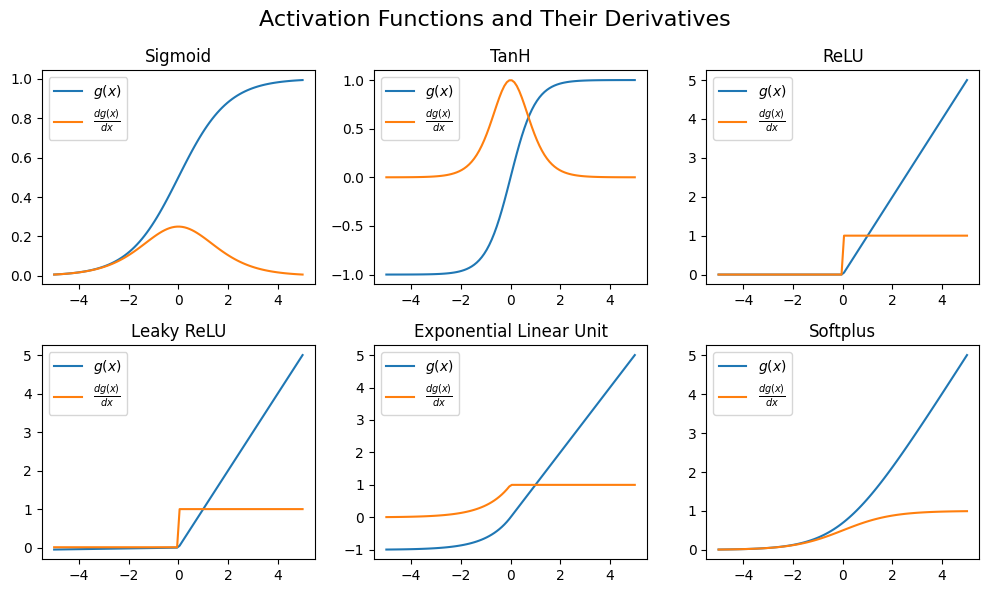

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def activations(name, x, alpha1=0.01, alpha2=1.0):
    if name == 'sigmoid':
        return 1 / (1 + np.exp(-x))
    elif name == 'tanh':
        return np.tanh(x)
    elif name == 'relu':
        return np.maximum(0, x)
    elif name == 'leaky_relu':
        return np.maximum(alpha1 * x, x)
    elif name == 'elu':
        return np.where(x > 0, x, alpha2 * (np.exp(x) - 1))
    elif name == 'softplus':
        return np.log(1 + np.exp(x))
    
def derivatives(name, x, alpha1=0.01, alpha2=1.0):
    if name == 'sigmoid':
        return activations(name, x) * (1 - activations(name, x))
    elif name == 'tanh':
        return 1 - np.tanh(x)**2
    elif name == 'relu':
        return np.where(x > 0, 1, 0)
    elif name == 'leaky_relu':
        return np.where(x > 0, 1, alpha1)
    elif name == 'elu':
        return np.where(x > 0, 1, alpha2 * np.exp(x))
    elif name == 'softplus':
        return activations('sigmoid', x)
    
names = {
    'sigmoid': 'Sigmoid',
    'tanh': 'TanH',
    'relu': 'ReLU',
    'leaky_relu': 'Leaky ReLU',
    'elu': 'Exponential Linear Unit',
    'softplus': 'Softplus'
}

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle('Activation Functions and Their Derivatives', fontsize=16)

for i, f in enumerate(names.keys()):
    x = np.linspace(-5, 5, 100)
    axes.flat[i].plot(x, activations(f, x), label='$g(x)$')
    axes.flat[i].plot(x, derivatives(f, x), label='$\\frac{dg(x)}{dx}$')
    axes.flat[i].set_title(names[f])
    axes.flat[i].legend()


plt.tight_layout()
plt.show()